Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [92]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Inputs;:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - q: float, the optimal revenue
    """
    if n == 0:
        return 0 
    q = p[0]
    for i in range(1, n):
        q = max(q, p[i] + cut_rod(p, n-1-i))
    return q

In [93]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [94]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs
    - r: list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod
    of length i. As such:
        * r[0] = 0
        * len(r) == n + 1
    - s: list of ints, the optimal sizes of the first piece to cut off. Also make sure 
    that:
        * s[0] = 0
        * len(s) == n + 1
    """
    best_result = [0] * (n + 1)
    sol_storage = [0] * (n + 1)
    
    for j in range(1, n + 1):
        current_best = p[0]
        for i in range(1, j + 1):
            if current_best < p[i] + best_result[j - i]:
                current_best = p[i] + best_result[j - i]
                sol_storage[j] = i
        best_result[j] = current_best
        
    return best_result, sol_storage

In [95]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - sol: a list of ints, indicating how to cut the rod. Cutting the rod with the lengths
    given in sol gives the optimal revenue.
        * print_cut_rod_solution(p,0) == []
    """
    b,solutions = extended_bottom_up_cut_rod(p, n)
    while n > 0:
        print(solutions[n])
        n = n - solutions[n]


In [96]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

IndexError: list index out of range

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [97]:
from random import randint

N = 20
p = []
for i in range(N):
    elem = randint(i, i + 5*i)
    p.append(elem)
print(p)

[0, 3, 3, 16, 12, 17, 27, 25, 25, 10, 53, 44, 23, 33, 70, 88, 35, 92, 59, 43]


## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009970664978027344, 0.0, 0.0, 0.0, 0.0009970664978027344, 0.0019605159759521484, 0.0009975433349609375, 0.0009982585906982422, 0.00299072265625, 0.006982088088989258]


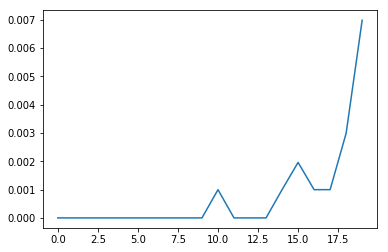

In [98]:
from matplotlib import pyplot as plt
import time

run_times = []
for n in range(N):
    start = time.time()
    cut_rod(p, n)
    run_times.append(time.time() - start)
print(run_times)
    
plt.plot(range(N), run_times)
plt.show()


## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009975433349609375]


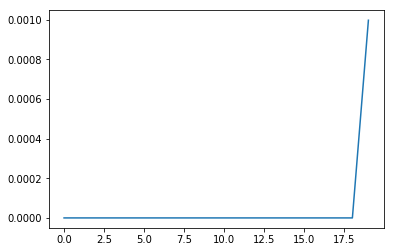

In [99]:
run_times = []
for n in range(N):
    start = time.time()
    extended_bottom_up_cut_rod(p, n)
    run_times.append(time.time() - start)
print(run_times)
    
plt.plot(range(N), run_times)
plt.show()

## Question 4.

Contrast both curves. What can you conclude?

Here I can see that the brute force algorithm or the cut_rod algorithm can calculate the optimal solution in linear time before values less than 10 only. But in the extended Algorithm we can see that this linear time has increased to 17 elements for the same arrat

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

We can clearly see that time complexity is increasing at an exponentional level so the complexity of cut_rod would be O($2^n$). So we can calculate the required N by using the following steps

$2^n$= 10000000

Taking log on both sides

x log (2) = log(10000000)

x = log(10000000)-log(2)

x=6

So the value of N would be $2^6$


N=64

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

[0, 2, 5, 15, 18, 6, 27, 31, 29, 28, 25, 55, 61, 48, 14, 42, 79, 100, 68, 83, 81, 91, 75, 92, 105, 73, 61, 45, 111, 35, 97, 37, 170, 132, 144, 124, 171, 81, 107, 232, 179, 240, 70, 58, 168, 169, 185, 282, 63, 107, 141, 272, 97, 83, 220, 262, 224, 63, 261, 253, 77, 354, 165, 251]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000997781753540039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009965896606445312, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009999275207519531, 0.0, 0.0, 0.0009958744049072266, 0.0, 0.0, 0.0, 0.0009963512420654297, 0.0, 0.0009980201721191406, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009968280792236328, 0.0, 0.0009980201721191406, 0.0]


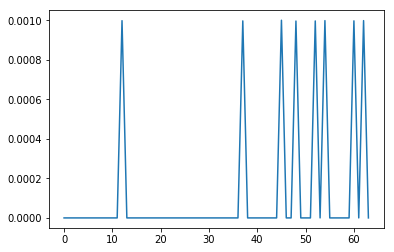

In [100]:
from random import randint

N = 64
p = []
for i in range(N):
    elem = randint(i, i + 5*i)
    p.append(elem)
print(p)
run_times = []
for n in range(N):
    start = time.time()
    extended_bottom_up_cut_rod(p, n)
    run_times.append(time.time() - start)
print(run_times)
    
plt.plot(range(N), run_times)
plt.show()

As we can see here it only took fraction of a second to calculate this. The zero values we can see in the output above shows how dynamic progeamming is working and the time to calculate for that input is zero

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE